# Model Code

### 1. Implement the following function that generates the polynomial and interaction features for a given degree of the polynomial. 

In [37]:
import numpy as np
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt
import time
from itertools import product

In [2]:
def polynomialFeatures(X, degree=1):
    #getting rows and columns
    rows, columns = X.shape
    combinations = []
    #based on the degree, getting combinations values
    for degree in range(1, degree+1):
        for comb in combinations_with_replacement(range(columns), degree):
            combinations.append(comb)
    #initializing an empty numpy array
    output = np.empty((rows, len(combinations)), dtype=float)
    #values for the polynomial features
    for i, comb in enumerate(combinations):
        output[:, i] = X[:, comb].prod(1)

    return output

### 2. Implement the following function to calculate and return the mean squared error (mse) of two vectors. 

In [3]:
#function to calculate mean squared error
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

### 3. Implement the following function to compute training and validation errors. It will be used to plot learning curves. The function takes the feature matrix X (usually the training data matrix) and the training size (from the “train_size” parameter) and by using cross-validation computes the average mse for the training fold and the validation fold. It iterates through the entire X with an increment step of the “train_size”.

In [4]:
#Note this function only supports an integer for training size parameter
import math
def learning_curve(model, X, Y, cv, train_sizes=1, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambda_=0.0, **kwargs):
    train_scores = []
    val_scores = []
    if isinstance(train_sizes, int):
       train_sizes = np.arange(train_sizes, len(X) + 1, train_sizes)
#note I added the else statement to send an error message
    else:
        print("Error, not type int")
        return np.array(-1), np.array(-1)
    print(f"Train sizes: {train_sizes}")
    for size in train_sizes:
        print('\n-----------------------------------------------------')
        print(f"Train size: {size}")
        print('-----------------------------------------------------')
#using the Kfold function to get train and validation scores
        cv_results= kfold(model,cv,X[:size],Y[:size],lambda_,learning_rate,regularizer)
        train_scores.append(math.sqrt(np.mean(cv_results['scores']['train_scores'])))
        val_scores.append(math.sqrt(np.mean(cv_results['scores']['test_scores'])))

    return np.array(train_scores), np.array(val_scores)

### 

### 5. Implement a Linear_Regression model class. It should have the following three methods. Note the that “fit” method should implement the batch gradient descent algorithm.

In [5]:

class Linear_Regression:
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=0.01, epochs=500, tol=None, regularizer=None, lambda_=0.0, **kwargs):
        #adding bias term to the train matrix
        X = np.column_stack((np.ones(len(X)), X))
        rows, columns = X.shape
        #initializing theta_hat to zeroes based on size of the 
        theta_hat = np.zeros((columns, 1))
        Y = Y.reshape(-1, 1)
        #running for a number of epochs
        for _ in range(epochs):
            #computing predictions using matrix multiplication
            y_pred = X @ theta_hat
            #computing loss function
            error = mse(Y, y_pred)
            #computing gradient
            gradient = (X.T @ (y_pred - Y)) / rows
            
            #regularizer
            if regularizer == 'l1':
                gradient[1:] += lambda_ * np.sign(theta_hat[1:]) / rows
            elif regularizer == 'l2':
                gradient[1:] += 2 * lambda_ * theta_hat[1:] / rows
            #updating parameter
            theta_hat -= learning_rate * gradient
      
            #using tol as an early stopping measure
            if tol is not None:
                new_error = mse(Y, X @ theta_hat)
                if error - new_error < tol:
                    break
        #updating final theta
        self.theta = theta_hat

    def predict(self, X):
        #adding a bias term
        X = np.column_stack((np.ones(len(X)), X))
        #using theta parameters to calculate prediction via matrix multiplication
        return X @ self.theta

In [38]:
#implementing a StandardScaler class to standardize the data
class StandardScaler:
    def __init__(self):
        pass
    #fit method to calculate mean and standard deviation
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    #uses the learned mean and standard deviation to scale transform data
    def transform(self, X):
        return (X - self.mean) / self.std


# Data Processing

### 6. Read in the winequality-red.csv file as a Pandas data frame.

In [7]:
import pandas as pd
df = pd.read_csv('winequality-white.csv', sep=";")

print("Dimension of the data: ", df.shape)
no_of_rows = df.shape[0]
no_of_columns = df.shape[1]
print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

df.head(5)

Dimension of the data:  (4898, 12)
No. of Rows: 4898
No. of Columns: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 7. Summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 8. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.

In [9]:
sample = df.sample(frac=1)

### 9. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any. 

In [10]:
#using seaborn to create a pairplot to help analyze the data
import seaborn as sns
sns.pairplot(sample, hue='quality')

In [11]:
#the feat_matrix is the matrix containing all the features also known as X
#target vector is the vector with the labels, also known as y
#t is the percent of the data that will be separated as the test data
def partition(X, y,t):
    #getting the size of the matrix
    test_set_size = int(len(X)*t)
    #based on the test_set_size we are setting the new variables that will be returned
    train_X = X[test_set_size:]
    test_X = X[:test_set_size]
    train_y = y[test_set_size:]
    test_y = y[:test_set_size]
    
    return train_X, test_X, train_y, test_y

In [12]:
#setting the testing data to be 20% of the total data
t=0.2

#creating the dataframes to be partitioned into train_matrix, test_matrix, train_target_vector, test_target_vector
y=sample['quality'] # 1D targer vector

# Data Matrix containing all features excluding the target
X = sample.drop(labels='quality', axis=1) 

#converting the dataframes into numpy arrays
X=X.to_numpy()
y=y.to_numpy()

no_of_rows = X.shape[0]
no_of_columns = X.shape[1]
print("No. of Rows X: %d" % no_of_rows)
print("No. of Columns X: %d" % no_of_columns)
print(X.shape)

no_of_rows = y.shape[0]
print("No. of Rows y: %d" % no_of_rows)
print(y.shape)

#all partitions and printin the lentgh of each one to confirm 
X_train, X_test,y_train, y_test = partition(X,y,t)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

No. of Rows X: 4898
No. of Columns X: 11
(4898, 11)
No. of Rows y: 4898
(4898,)
3919
979
3919
979


In [39]:
# assuming X_train and X_test are the feature sets and y_train and y_test are the labels
# instantiate the scaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform the training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# transform the test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

# Model Evaluation

### 10. Model selection via Hyperparameter tuning: Use the kFold function (known as sFold function from previous assignment) to evaluate the performance of your model over each combination of lambda, learning_rate and regularizer from the following sets:

In [15]:
#partition_data() is a helper function that splits the data into a given number of folds
# data must me numpy array
def partition_data(data, folds):
    # Partition the data into s equally sized portions
    partitions = np.array_split(data, folds)
    return partitions

def kfold(model,folds,data,labels,lambda_values,learning_rate_values,regularizers):
    
    # get the start time
    st = time.time()
    
    best_params = None
    lowest_error = float('inf')
    #results = []
    counter=0
    fit=0
    train_scores=[]
    test_scores=[]
    scores={'train_scores': train_scores,'test_scores': test_scores}
    
    #splitting the data and the target labels into given number of folds
    #storing the split data and labels in numpy arrays
    split_data = partition_data(data, folds)
    split_labels = partition_data(labels, folds)
    
    
    #These are 1-d vectors that willl store the labels for every single cross validation
    y_test_all_partitions=[]
    y_pred_all_partitions=[]
    
    total_combinations=product(lambda_values, learning_rate_values, regularizers)
    print(f"Total combination {total_combinations}")
    
    for lam_, learn_rate, reg in total_combinations:
        counter+=1
        print(f"Current combination(given by counter):{counter}")
        epoch_start=time.time()
        
        for i in range(0, folds):
            
            print(f"current fold: {i}")
            # initializing the X_test and y_test numpy variables
            y_test = split_labels[i]
            X_test = split_data[i]

            #initializing and storing the train data is not so easy as the test data because we have to 
            #combine the remaining folds into one large numpy array
            #for example if folds=5, the test data will simply be 1/5th of the total data
            #the training data will be 4/5th of the total data
            #on the next two for loops I am concatenating the remaining data not including the 1/5th that belongs
            #to the test data
            #essentially the for loops are appending 1/5th+ 1/5th+ 1/5th+ 1/5th= 4/5th for the 
            #train data and train vector of the current cross validation(fold)
            initialized_y = False
            initialized_X = False
            for j in range(0, folds):
                if j != i and initialized_y == False:
                    y_train = split_labels[j]
                    initialized_y = True
                elif j != i:
                    y_train = np.append(y_train, split_labels[j], axis=0)

            for j in range(0, folds):
                if j != i and initialized_X == False:
                    X_train = split_data[j]
                    initialized_X = True
                elif j != i:
                    X_train = np.append(X_train, split_data[j], axis=0)

            fit+=1
            print(f"Current fit:{fit}")
            #fitting the model to the given parameters
            model.fit(X_train, y_train, learning_rate=learn_rate, regularizer=reg, lambda_=lam_)
            #predicting on both training and test
            y_train_pred = model.predict(X_train)
            y_test_pred=model.predict(X_test)
            #error functions
            train_error = mse(y_train, y_train_pred)
            test_error=mse(y_test, y_test_pred)
            
            #printing and appending error values
            print(f"train error for current fit #:{train_error}")
            train_scores.append(train_error)
            test_scores.append(test_error)
            #updating new best error
            if train_error < lowest_error:
                lowest_error = train_error
                
                #best parameters
                best_params = (lam_, learn_rate, reg)
                print("New Lowest error and new best params")
                print(lowest_error)
                print(best_params)
        epoch_end=time.time()
        print(f"Current epoch execution time:{epoch_end-epoch_start}")
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    return {"Best parameters": best_params,"Lowest error": lowest_error,'scores':scores}

In [16]:
#This is important. This is hyperparameter tuning/model selection. Takes about 40 minutes to run with epoch of 500

lambda_values = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate_values = [0.1, 0.01, 0.001, 0.0001]
regularizers = ['l1', 'l2']
model_testing = Linear_Regression()

kfold=kfold(model_testing,5,X_train,y_train,lambda_values,learning_rate_values,regularizers)

print(f"Best parameters: {kfold['Best parameters']}")
print(kfold['Lowest error'])
for i in range(len(kfold['scores']['train_scores'])):
    print(kfold['scores']['train_scores'][i])


#### 11. Evaluate your model on the test data and report the mean squared error. 

In [17]:
#Using the best hyperparameters we are testing out optimal model
#best_params = (lam_, learn_rate, reg)
lin_reg_BGD_opt =Linear_Regression()
lin_reg_BGD_opt.fit(X_train, y_train,learning_rate=0.01, epochs=500, tol=None, regularizer='l1',lambda_=1)
y_test_pred=lin_reg_BGD_opt.predict(X_test)

print("Optimal model MSE for test data")
print(mse(y_test, y_test_pred))


Optimal model MSE for test data
0.9676865135556464


### 12. Using the best model plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve.

In [18]:
#getting train scores and validation score values from learning curve function
#best_params = (lam_, learn_rate, reg)
#using best parameters
lambda_values = [1.0]
learning_rate_values = [0.01]
regularizers = ['l1']


train_scores, val_scores = learning_curve(lin_reg_BGD_opt, X_train,y_train, cv=5, train_sizes=50,learning_rate=learning_rate_values,epochs=500,tol=None,regularizer=regularizers,lambda_=lambda_values)
print(f"Trainining error scores {train_scores}")
print(f"Validation error scores {val_scores}")


Train sizes: [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500
 3550 3600 3650 3700 3750 3800 3850 3900]

-----------------------------------------------------
Train size: 50
-----------------------------------------------------
Total combination <itertools.product object at 0x11e242b80>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.670572395290188
New Lowest error and new best params
0.670572395290188
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9926747505196221
current fold: 2
Current fit:3
train error for current fit #:0.9163799462434516
current fold: 3
Current fit:4
train error for current fit

train error for current fit #:0.9713540865538646
New Lowest error and new best params
0.9713540865538646
(1.0, 0.01, 'l1')
current fold: 4
Current fit:5
train error for current fit #:1.03662951508164
Current epoch execution time:0.03392195701599121
Execution time: 0.03396129608154297 seconds

-----------------------------------------------------
Train size: 600
-----------------------------------------------------
Total combination <itertools.product object at 0x11e215e00>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:1.034206913723016
New Lowest error and new best params
1.034206913723016
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0682172731757131
current fold: 2
Current fit:3
train error for current fit #:1.121219620239408
current fold: 3
Current fit:4
train error for current fit #:0.9801508008325054
New Lowest error and new best params
0.9801508008325054
(1.0, 0.01, 'l1')
current fold: 4
Curre

train error for current fit #:0.947817425102217
New Lowest error and new best params
0.947817425102217
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9633832702745743
current fold: 2
Current fit:3
train error for current fit #:0.9279360486840009
New Lowest error and new best params
0.9279360486840009
(1.0, 0.01, 'l1')
current fold: 3
Current fit:4
train error for current fit #:1.000026312932749
current fold: 4
Current fit:5
train error for current fit #:0.9898104650672859
Current epoch execution time:16.229572057724
Execution time: 16.229636907577515 seconds

-----------------------------------------------------
Train size: 1100
-----------------------------------------------------
Total combination <itertools.product object at 0x11e216fc0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9753132798135468
New Lowest error and new best params
0.9753132798135468
(1.0, 0.01, 'l1')
current fold: 1
Current

train error for current fit #:1.003158065905485
current fold: 3
Current fit:4
train error for current fit #:0.976374618436167
current fold: 4
Current fit:5
train error for current fit #:0.976566054386484
Current epoch execution time:17.1462881565094
Execution time: 17.146382093429565 seconds

-----------------------------------------------------
Train size: 1550
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2301c0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9874945649693885
New Lowest error and new best params
0.9874945649693885
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9291829307742188
New Lowest error and new best params
0.9291829307742188
(1.0, 0.01, 'l1')
current fold: 2
Current fit:3
train error for current fit #:1.0021711339308121
current fold: 3
Current fit:4
train error for current fit #:0.9889630903208785
current fold: 4
C

train error for current fit #:0.9201219196566955
New Lowest error and new best params
0.9201219196566955
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9230594804187798
current fold: 2
Current fit:3
train error for current fit #:0.936285054901014
current fold: 3
Current fit:4
train error for current fit #:0.924656388436513
current fold: 4
Current fit:5
train error for current fit #:0.977865213060573
Current epoch execution time:15.99237585067749
Execution time: 15.992472887039185 seconds

-----------------------------------------------------
Train size: 2050
-----------------------------------------------------
Total combination <itertools.product object at 0x11e07e440>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9297013156569134
New Lowest error and new best params
0.9297013156569134
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9317914295730316
current fold: 2


train error for current fit #:0.929048711742989
current fold: 3
Current fit:4
train error for current fit #:0.9720820874735046
current fold: 4
Current fit:5
train error for current fit #:0.9355682906973299
Current epoch execution time:14.739177942276001
Execution time: 14.73926591873169 seconds

-----------------------------------------------------
Train size: 2550
-----------------------------------------------------
Total combination <itertools.product object at 0x11dcce440>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9302649678956266
New Lowest error and new best params
0.9302649678956266
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.958263856098012
current fold: 2
Current fit:3
train error for current fit #:0.9354790384104377
current fold: 3
Current fit:4
train error for current fit #:0.9695383139446613
current fold: 4
Current fit:5
train error for current fit #:0.9409732067370972
Current ep

train error for current fit #:0.9583960558162836
New Lowest error and new best params
0.9583960558162836
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.992049800374137
current fold: 2
Current fit:3
train error for current fit #:0.9959807721458701
current fold: 3
Current fit:4
train error for current fit #:0.9863620621844273
current fold: 4
Current fit:5
train error for current fit #:0.9408758499529648
New Lowest error and new best params
0.9408758499529648
(1.0, 0.01, 'l1')
Current epoch execution time:15.897439956665039
Execution time: 15.897531032562256 seconds

-----------------------------------------------------
Train size: 3100
-----------------------------------------------------
Total combination <itertools.product object at 0x11e232500>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9610926641285213
New Lowest error and new best params
0.9610926641285213
(1.0, 0.01, 'l1')
current fold: 1
Cu

train error for current fit #:0.9648069951217183
New Lowest error and new best params
0.9648069951217183
(1.0, 0.01, 'l1')
Current epoch execution time:3.288496255874634
Execution time: 3.2887370586395264 seconds

-----------------------------------------------------
Train size: 3550
-----------------------------------------------------
Total combination <itertools.product object at 0x11e07e440>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9943023479240474
New Lowest error and new best params
0.9943023479240474
(1.0, 0.01, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0140294697226429
current fold: 2
Current fit:3
train error for current fit #:1.028946519504187
current fold: 3
Current fit:4
train error for current fit #:0.9881503725315419
New Lowest error and new best params
0.9881503725315419
(1.0, 0.01, 'l1')
current fold: 4
Current fit:5
train error for current fit #:0.966892718104349
New Lowest error and

78
78


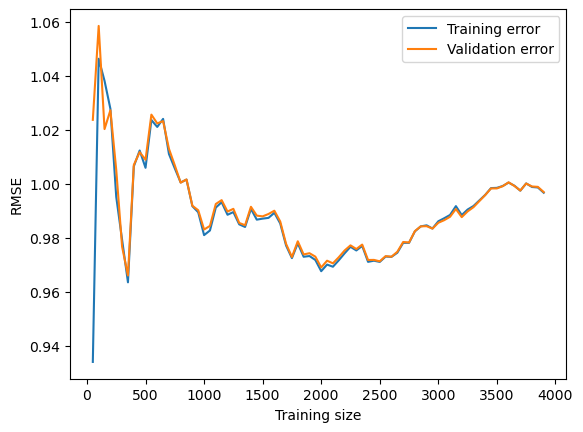

In [19]:
#plotting Learning curve
#plotted with 50 as step size and I standardized the data after doing train test split

#note the train size is hardcoded
train_sizes = np.arange(50, len(X_train) + 1, 50)
print(len(train_sizes))
print(len(train_scores))

plt.plot(train_sizes, train_scores, label='Training error')
plt.plot(train_sizes, val_scores, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Determine the best model hyperparameter values for the training data matrix with polynomial degree 3 and plot the learning curve. Use the rmse values obtained from the “learning_curve” function to plot this curve.

In [20]:
X_poly=polynomialFeatures(X, degree=3)

In [21]:
#all partitions and printing the lentgh of each one to confirm the partition worked
X_train_poly, X_test_poly,y_train, y_test = partition(X_poly,y,t)
print(len(X_train_poly))
print(len(X_test_poly))
print(len(y_train))
print(len(y_test))

3919
979
3919
979


In [22]:
#checking the shape as we now have more features
print(X_train_poly.shape)
print(X_test_poly.shape)
print(y_train.shape)
print(y_test.shape)

(3919, 363)
(979, 363)
(3919,)
(979,)


In [24]:
#having trouble with the polynomial data so I am normalizing the data instead of standardizing it
# calculate the minimum and maximum values for each feature
min_vals_train = np.min(X_train_poly, axis=0)
max_vals_train = np.max(X_train_poly, axis=0)

# normalize the data using min-max scaling
normalized_X_train_poly = (X_train_poly - min_vals_train) / (max_vals_train - min_vals_train)


# calculate the minimum and maximum values for each feature
min_vals_test = np.min(X_test_poly, axis=0)
max_vals_test = np.max(X_test_poly, axis=0)

# normalize the data using min-max scaling
normalized_X_test_poly = (X_test_poly - min_vals_test) / (max_vals_test - min_vals_test)


In [25]:
#This is important. This is hyperparameter tuning/model selection FOR DEGREE 3. 

lambda_values = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate_values = [0.1, 0.01, 0.001, 0.0001]
regularizers = ['l1', 'l2']
model_testing_poly = Linear_Regression()


kfold=kfold(model_testing_poly,5,normalized_X_train_poly,y_train,lambda_values,learning_rate_values,regularizers)

print(f"Best parameters: {kfold['Best parameters']}")
print(kfold['Lowest error'])
for i in range(len(kfold['scores']['train_scores'])):
    print(kfold['scores']['train_scores'][i])


In [26]:
#evaluating best polynomial model degree 3 with optimal parameters
#best_params = (lam_, learn_rate, reg)
lin_reg_BGD_opt =Linear_Regression()
lin_reg_BGD_opt.fit(X_train, y_train,learning_rate=0.1, epochs=500, tol=None, regularizer='l1',lambda_=1)
y_test_pred=lin_reg_BGD_opt.predict(X_test)

print("Optimal model MSE for test data")
print(mse(y_test, y_test_pred))


Optimal model MSE for test data
0.9823235526047772


In [27]:
#getting train scores and validation score values from learning curve function
#best_params = (lam_, learn_rate, reg)
lambda_values = [1.0]
learning_rate_values = [0.1]
regularizers = ['l1']
lin_reg_BGD_poly_opt = Linear_Regression()
train_scores, val_scores = learning_curve(lin_reg_BGD_poly_opt, normalized_X_train_poly,y_train, cv=5, train_sizes=50,learning_rate=learning_rate_values,epochs=500,tol=None,regularizer=regularizers,lambda_=lambda_values)
print(f"Trainining error scores {train_scores}")
print(f"Validation error scores {val_scores}")


Train sizes: [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500
 3550 3600 3650 3700 3750 3800 3850 3900]

-----------------------------------------------------
Train size: 50
-----------------------------------------------------
Total combination <itertools.product object at 0x11dcce500>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.6121858050578514
New Lowest error and new best params
0.6121858050578514
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9157283592598452
current fold: 2
Current fit:3
train error for current fit #:0.8033146817491424
current fold: 3
Current fit:4
train error for current fi

train error for current fit #:1.042386298590502
New Lowest error and new best params
1.042386298590502
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0741528742782933
current fold: 2
Current fit:3
train error for current fit #:1.120505265535253
current fold: 3
Current fit:4
train error for current fit #:1.0345349586049564
New Lowest error and new best params
1.0345349586049564
(1.0, 0.1, 'l1')
current fold: 4
Current fit:5
train error for current fit #:1.0712776012202843
Current epoch execution time:11.555518865585327
Execution time: 11.555570125579834 seconds

-----------------------------------------------------
Train size: 550
-----------------------------------------------------
Total combination <itertools.product object at 0x11e244900>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:1.0763526565967019
New Lowest error and new best params
1.0763526565967019
(1.0, 0.1, 'l1')
current fold: 1
Current 

train error for current fit #:0.993316039501797
New Lowest error and new best params
0.993316039501797
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0134157495734502
current fold: 2
Current fit:3
train error for current fit #:0.9819928885373808
New Lowest error and new best params
0.9819928885373808
(1.0, 0.1, 'l1')
current fold: 3
Current fit:4
train error for current fit #:1.0448772300216662
current fold: 4
Current fit:5
train error for current fit #:1.0563009564814967
Current epoch execution time:12.393204927444458
Execution time: 12.393304109573364 seconds

-----------------------------------------------------
Train size: 1050
-----------------------------------------------------
Total combination <itertools.product object at 0x1227b6340>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9967334607157822
New Lowest error and new best params
0.9967334607157822
(1.0, 0.1, 'l1')
current fold: 1
Curren

train error for current fit #:1.0417128122910086
Current epoch execution time:13.8140287399292
Execution time: 13.814125061035156 seconds

-----------------------------------------------------
Train size: 1500
-----------------------------------------------------
Total combination <itertools.product object at 0x1227b2840>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:1.032703390776532
New Lowest error and new best params
1.032703390776532
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9942383340154954
New Lowest error and new best params
0.9942383340154954
(1.0, 0.1, 'l1')
current fold: 2
Current fit:3
train error for current fit #:1.0621483333499226
current fold: 3
Current fit:4
train error for current fit #:1.03525464708067
current fold: 4
Current fit:5
train error for current fit #:1.0346528814682314
Current epoch execution time:13.638823986053467
Execution time: 13.638921022415161 seconds

-------

train error for current fit #:0.98769532560129
New Lowest error and new best params
0.98769532560129
(1.0, 0.1, 'l1')
current fold: 2
Current fit:3
train error for current fit #:1.0181826887010537
current fold: 3
Current fit:4
train error for current fit #:1.008776155666171
current fold: 4
Current fit:5
train error for current fit #:1.0312413991106693
Current epoch execution time:14.809280157089233
Execution time: 14.809324026107788 seconds

-----------------------------------------------------
Train size: 2000
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2e1080>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9801715991013797
New Lowest error and new best params
0.9801715991013797
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9897359341256406
current fold: 2
Current fit:3
train error for current fit #:0.9997939468567727
current fold: 3
Cur

train error for current fit #:0.9844167139431039
New Lowest error and new best params
0.9844167139431039
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0148916113579252
current fold: 2
Current fit:3
train error for current fit #:0.9872819649706674
current fold: 3
Current fit:4
train error for current fit #:1.028444644186081
current fold: 4
Current fit:5
train error for current fit #:0.9984783826896151
Current epoch execution time:14.189229965209961
Execution time: 14.189337968826294 seconds

-----------------------------------------------------
Train size: 2550
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2f5540>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.986376866722837
New Lowest error and new best params
0.986376866722837
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0200438981272737
current fold: 2
C

train error for current fit #:1.0458810104762006
current fold: 4
Current fit:5
train error for current fit #:1.0018602646526542
New Lowest error and new best params
1.0018602646526542
(1.0, 0.1, 'l1')
Current epoch execution time:15.749521017074585
Execution time: 15.749563932418823 seconds

-----------------------------------------------------
Train size: 3050
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2ccdc0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:1.0087801662630005
New Lowest error and new best params
1.0087801662630005
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0429896577895885
current fold: 2
Current fit:3
train error for current fit #:1.0415909941947137
current fold: 3
Current fit:4
train error for current fit #:1.041496637702532
current fold: 4
Current fit:5
train error for current fit #:1.0003816808001584
New Lowest erro

train error for current fit #:1.0436722758188353
New Lowest error and new best params
1.0436722758188353
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:1.0629194223996308
current fold: 2
Current fit:3
train error for current fit #:1.0818108552145638
current fold: 3
Current fit:4
train error for current fit #:1.0412942326139847
New Lowest error and new best params
1.0412942326139847
(1.0, 0.1, 'l1')
current fold: 4
Current fit:5
train error for current fit #:1.0215445147531435
New Lowest error and new best params
1.0215445147531435
(1.0, 0.1, 'l1')
Current epoch execution time:16.294947862625122
Execution time: 16.295043230056763 seconds

-----------------------------------------------------
Train size: 3550
-----------------------------------------------------
Total combination <itertools.product object at 0x11e21ad00>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:1.0442383561899797
New Lowest error and

78
78


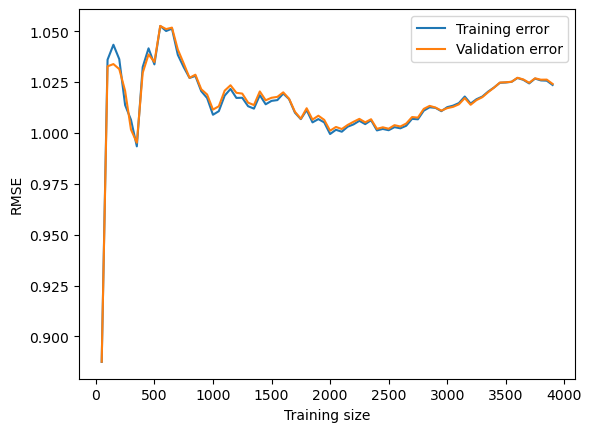

In [28]:
#plotting Learning curve
#plotted with 50 as step size and I normalize the data after doing train test split
#note the train size is hardcoded
train_sizes = np.arange(50, len(X_train) + 1, 50)
print(len(train_sizes))
print(len(train_scores))

plt.plot(train_sizes, train_scores, label='Training error')
plt.plot(train_sizes, val_scores, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Checking if dropping features will improve the learning curve

In [29]:
#Variable Correlations with the target "Quality"
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [30]:
#dropping redundant features from sample dataframe
df_drop = df.drop(labels=['citric acid','residual sugar','free sulfur dioxide'], axis = 1)
df_drop.sample(frac=1)
df_drop.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.058,186.0,0.9956,3.19,0.40,9.9,6


In [31]:


#setting the testing data to be 20% of the total data
t=0.2

#creating the dataframes to be partitioned into train_matrix, test_matrix, train_target_vector, test_target_vector
y=df_drop['quality'] # 1D targer vector

# Data Matrix containing all features excluding the target
X_drop = df_drop.drop(labels='quality', axis=1) 

#converting the dataframes into numpy arrays
X_drop=X_drop.to_numpy()
y=y.to_numpy()




no_of_rows = X_drop.shape[0]
no_of_columns = X_drop.shape[1]
print("No. of Rows X: %d" % no_of_rows)
print("No. of Columns X: %d" % no_of_columns)
print(X_drop.shape)

no_of_rows = y.shape[0]

print("No. of Rows y: %d" % no_of_rows)

print(y.shape)



#all partitions and printin the lentgh of each one to confirm 
X_drop_train, X_drop_test,y_train, y_test = partition(X,y,t)
print(len(X_drop_train))
print(len(X_drop_test))
print(len(y_train))
print(len(y_test))



No. of Rows X: 4898
No. of Columns X: 8
(4898, 8)
No. of Rows y: 4898
(4898,)
3919
979
3919
979


In [32]:

# assuming X_train and X_test are the feature sets and y_train and y_test are the labels
# instantiate the scaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform the training data
scaler.fit(X_drop_train)

X_drop_train = scaler.transform(X_drop_train)

# transform the test data using the scaler fitted on the training data
X_drop_test = scaler.transform(X_drop_test)

In [33]:
#This is important. This is hyperparameter tuning/model selection

lambda_values = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate_values = [0.1, 0.01, 0.001, 0.0001]
regularizers = ['l1', 'l2']
model_testing = Linear_Regression()

kfold=kfold(model_testing,5,X_drop_train,y_train,lambda_values,learning_rate_values,regularizers)

print(f"Best parameters: {kfold['Best parameters']}")
print(kfold['Lowest error'])
for i in range(len(kfold['scores']['train_scores'])):
    print(kfold['scores']['train_scores'][i])


In [34]:
#best_params = (lam_, learn_rate, reg)
lin_reg_BGD_drop_opt =Linear_Regression()
lin_reg_BGD_drop_opt.fit(X_drop_train, y_train,learning_rate=0.1, epochs=500, tol=None, regularizer='l1',lambda_=1)
y_test_drop_pred=lin_reg_BGD_drop_opt.predict(X_drop_test)

print("Optimal model MSE for test data")
print(mse(y_test, y_test_drop_pred))



Optimal model MSE for test data
0.8743298553216738


In [35]:
#getting train scores and validation score values from learning curve function
#best_params = (lam_, learn_rate, reg)
lambda_values = [1.0]
learning_rate_values = [0.1]
regularizers = ['l1']
lin_reg_BGD_drop_opt = Linear_Regression()
train_scores, val_scores = learning_curve(lin_reg_BGD_drop_opt, X_drop_train,y_train, cv=5, train_sizes=50,learning_rate=learning_rate_values,epochs=500,tol=None,regularizer=regularizers,lambda_=lambda_values)
print(f"Trainining error scores {train_scores}")
print(f"Validation error scores {val_scores}")




Train sizes: [  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500
 3550 3600 3650 3700 3750 3800 3850 3900]

-----------------------------------------------------
Train size: 50
-----------------------------------------------------
Total combination <itertools.product object at 0x122864900>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.9727369860254526
New Lowest error and new best params
0.9727369860254526
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.6841264135726938
New Lowest error and new best params
0.6841264135726938
(1.0, 0.1, 'l1')
current fold: 2
Current fit:3
train error for current fit #:0.

train error for current fit #:0.879100052583146
New Lowest error and new best params
0.879100052583146
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.8963825499421393
current fold: 2
Current fit:3
train error for current fit #:0.8905636619269152
current fold: 3
Current fit:4
train error for current fit #:0.8854325187826587
current fold: 4
Current fit:5
train error for current fit #:0.9475631185369416
Current epoch execution time:0.03607010841369629
Execution time: 0.03610110282897949 seconds

-----------------------------------------------------
Train size: 700
-----------------------------------------------------
Total combination <itertools.product object at 0x1228008c0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.8670343066068805
New Lowest error and new best params
0.8670343066068805
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.9189621384549211
current fold: 2

train error for current fit #:0.8365567995590287
current fold: 3
Current fit:4
train error for current fit #:0.8628195153668974
current fold: 4
Current fit:5
train error for current fit #:0.8502148809584891
Current epoch execution time:5.596001148223877
Execution time: 5.596089124679565 seconds

-----------------------------------------------------
Train size: 1200
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2b4480>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.803214478732878
New Lowest error and new best params
0.803214478732878
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.795481486243622
New Lowest error and new best params
0.795481486243622
(1.0, 0.1, 'l1')
current fold: 2
Current fit:3
train error for current fit #:0.819605280610705
current fold: 3
Current fit:4
train error for current fit #:0.8644010343224711
current fold: 4
Curre

train error for current fit #:0.791107539173265
New Lowest error and new best params
0.791107539173265
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.7914774851624863
current fold: 2
Current fit:3
train error for current fit #:0.8221925598825945
current fold: 3
Current fit:4
train error for current fit #:0.8532364102001102
current fold: 4
Current fit:5
train error for current fit #:0.8056839974338245
Current epoch execution time:4.151868104934692
Execution time: 4.151922941207886 seconds

-----------------------------------------------------
Train size: 1750
-----------------------------------------------------
Total combination <itertools.product object at 0x11e2f4640>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.778020201380924
New Lowest error and new best params
0.778020201380924
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.7699902419432603
New Lowest error and

train error for current fit #:0.8508928133766723
current fold: 3
Current fit:4
train error for current fit #:0.8238474098113613
current fold: 4
Current fit:5
train error for current fit #:0.7978101044247224
Current epoch execution time:9.584821939468384
Execution time: 9.584910154342651 seconds

-----------------------------------------------------
Train size: 2250
-----------------------------------------------------
Total combination <itertools.product object at 0x12288b280>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.7865531133434167
New Lowest error and new best params
0.7865531133434167
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.8313629481796873
current fold: 2
Current fit:3
train error for current fit #:0.8458417350547506
current fold: 3
Current fit:4
train error for current fit #:0.8182034275239409
current fold: 4
Current fit:5
train error for current fit #:0.8040796795709156
Current ep

train error for current fit #:0.8092949343374127
New Lowest error and new best params
0.8092949343374127
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.844076117146888
current fold: 2
Current fit:3
train error for current fit #:0.8299186164107497
current fold: 3
Current fit:4
train error for current fit #:0.8319661870892593
current fold: 4
Current fit:5
train error for current fit #:0.8175974271676524
Current epoch execution time:10.043321132659912
Execution time: 10.043424367904663 seconds

-----------------------------------------------------
Train size: 2800
-----------------------------------------------------
Total combination <itertools.product object at 0x12282e0c0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.8130783094891113
New Lowest error and new best params
0.8130783094891113
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.8448082602805949
current fold: 2

train error for current fit #:0.8222397035695341
current fold: 2
Current fit:3
train error for current fit #:0.79914157290547
current fold: 3
Current fit:4
train error for current fit #:0.7924865673547161
current fold: 4
Current fit:5
train error for current fit #:0.8243861747181007
Current epoch execution time:10.433990001678467
Execution time: 10.434090852737427 seconds

-----------------------------------------------------
Train size: 3300
-----------------------------------------------------
Total combination <itertools.product object at 0x12284e2c0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.781959690764422
New Lowest error and new best params
0.781959690764422
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.8162687121955077
current fold: 2
Current fit:3
train error for current fit #:0.7873599217903485
current fold: 3
Current fit:4
train error for current fit #:0.7950649925423017
current fold

train error for current fit #:0.73927425055028
New Lowest error and new best params
0.73927425055028
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.7690857864133046
current fold: 2
Current fit:3
train error for current fit #:0.7583942985676752
current fold: 3
Current fit:4
train error for current fit #:0.7603392871791308
current fold: 4
Current fit:5
train error for current fit #:0.8124944813493643
Current epoch execution time:8.413319110870361
Execution time: 8.413413763046265 seconds

-----------------------------------------------------
Train size: 3850
-----------------------------------------------------
Total combination <itertools.product object at 0x12282e0c0>
Current combination(given by counter):1
current fold: 0
Current fit:1
train error for current fit #:0.7412344394432825
New Lowest error and new best params
0.7412344394432825
(1.0, 0.1, 'l1')
current fold: 1
Current fit:2
train error for current fit #:0.7695529835401097
current fold: 2
Curr

78
78


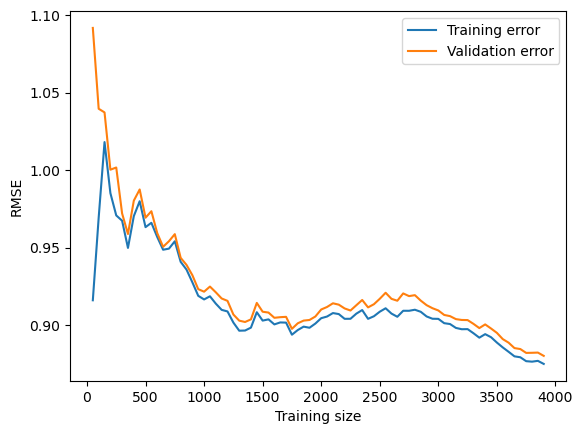

In [36]:
#plotting Learning curve
#plotted with 50 as step size and I standardized the data after doing train test split
#note the train size is hardcoded using step size as 50
train_sizes = np.arange(50, len(X_train) + 1, 50)
print(len(train_sizes))
print(len(train_scores))

plt.plot(train_sizes, train_scores, label='Training error')
plt.plot(train_sizes, val_scores, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend()
plt.show()